In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



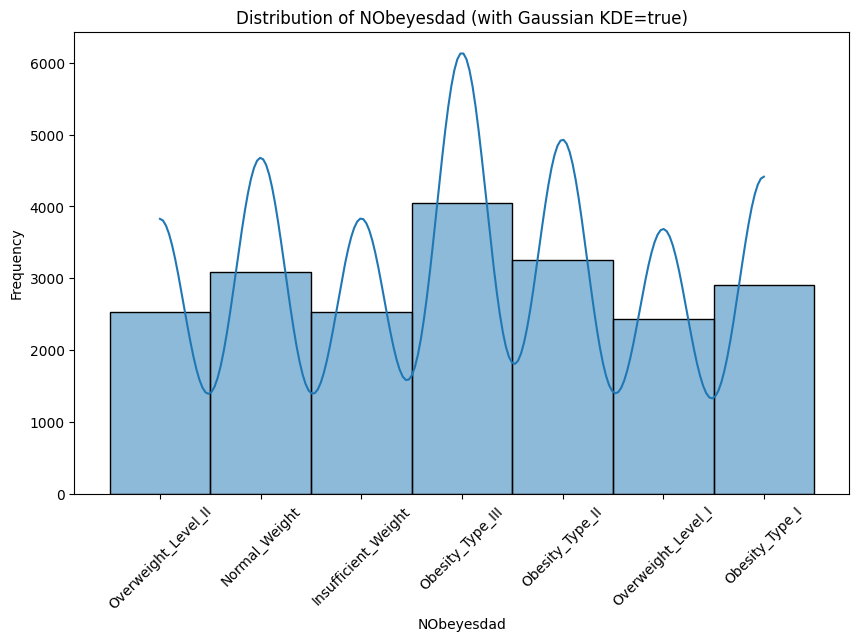

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data if not already loaded
train_df = pd.read_csv('train.csv')

# Check Gaussian distribution of NObeyesdad (target variable)
plt.figure(figsize=(10,6))
sns.histplot(train_df['NObeyesdad'], kde=True, bins=30)
plt.title('Distribution of NObeyesdad (with Gaussian KDE=true)')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:
def prepare_encoded_data():
    # Load training data
    train_df = pd.read_csv('train.csv')

    # Load test data
    test_df = pd.read_csv('test.csv')

    # Identify categorical features
    categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

    # Drop target from that list (we encode it separately)
    categorical_cols.remove('NObeyesdad')

    ## Step 1: Tag the data so we can combine and split cleanly later
    train_df['source'] = 'train'
    test_df['source'] = 'test'

    # Combine both datasets
    combined = pd.concat([train_df, test_df], axis=0)
    # One-hot encode the 8 categorical features
    combined_encoded = pd.get_dummies(combined, columns=categorical_cols)

    # Separate back the encoded train and test data
    rl_train_encoded = combined_encoded[combined_encoded['source'] == 'train'].drop(['source'], axis=1)
    rl_test_encoded = combined_encoded[combined_encoded['source'] == 'test'].drop(['source'], axis=1)

    # Create and apply the encoder
    target_encoder = LabelEncoder()
    rl_train_encoded['target'] = target_encoder.fit_transform(rl_train_encoded['NObeyesdad'])
    rl_test_encoded['target'] = target_encoder.fit_transform(rl_test_encoded['NObeyesdad'])

    # Optional: drop the original text column now
    rl_train_encoded = rl_train_encoded.drop(columns=['NObeyesdad'])
    rl_test_encoded = rl_test_encoded.drop(columns=['NObeyesdad'])

    return rl_train_encoded, rl_test_encoded




In [3]:
rl_train_encoded, rl_test_encoded = prepare_encoded_data()
# Separate features and target
X = rl_train_encoded

y = rl_train_encoded['target']

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.55      0.59       524
           1       0.65      0.72      0.68       626
           2       0.48      0.36      0.41       543
           3       0.69      0.68      0.69       657
           4       0.79      1.00      0.88       804
           5       0.48      0.34      0.40       484
           6       0.51      0.58      0.55       514

    accuracy                           0.64      4152
   macro avg       0.60      0.60      0.60      4152
weighted avg       0.62      0.64      0.62      4152



C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
X_test = rl_test_encoded
y_test_pred = model.predict(X_test)
X_test['Predicted_LR'] = y_test_pred
X_test[['id', 'Predicted_LR']].to_csv('Predicted_LR.csv', index=False)

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

rl_train_encoded, rl_test_encoded = prepare_encoded_data()

X_enc = rl_train_encoded
y_enc = rl_train_encoded['target']

# Split encoded data for validation
X_train_enc, X_val_enc, y_train_enc, y_val_enc = train_test_split(X_enc, y_enc, test_size=0.2, random_state=142)

# Build Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_enc, y_train_enc)

# Predict and evaluate
y_pred_enc = qda_model.predict(X_val_enc)
print(classification_report(y_val_enc, y_pred_enc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       572
           3       1.00      1.00      1.00       702
           4       1.00      1.00      1.00       795
           5       1.00      1.00      1.00       463
           6       1.00      1.00      1.00       498

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152



C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of param

In [6]:
X_test = rl_test_encoded
y_pred = qda_model.predict(X_test)
X_test['Predicted_QDA'] = y_pred
X_test[['id', 'Predicted_QDA']].to_csv('Predicted_QDA.csv', index=False)

In [7]:
from sklearn.naive_bayes import GaussianNB

rl_train_encoded, rl_test_encoded = prepare_encoded_data()

X_enc = rl_train_encoded
y_enc = rl_train_encoded['target']

# Split encoded data for validation
X_train_enc, X_val_enc, y_train_enc, y_val_enc = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)

# Build Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_enc, y_train_enc)

# Predict and evaluate
y_pred_enc = nb_model.predict(X_val_enc)
print(classification_report(y_val_enc, y_pred_enc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       524
           1       0.99      1.00      0.99       626
           2       0.99      0.99      0.99       543
           3       1.00      1.00      1.00       657
           4       1.00      1.00      1.00       804
           5       1.00      0.99      0.99       484
           6       1.00      1.00      1.00       514

    accuracy                           1.00      4152
   macro avg       1.00      1.00      1.00      4152
weighted avg       1.00      1.00      1.00      4152



In [8]:
X_test = rl_test_encoded
y_pred = nb_model.predict(X_test)
X_test['Predicted_NB'] = y_pred
X_test[['id', 'Predicted_NB']].to_csv('Predicted_NB.csv', index=False)

## Improved SVM Model
This cell demonstrates several improvements for the SVM model:
- Feature scaling with StandardScaler
- Hyperparameter tuning using GridSearchCV
- Class weight balancing

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

rl_train_encoded, rl_test_encoded = prepare_encoded_data()

X_enc = rl_train_encoded.drop('target', axis=1)
y_enc = rl_train_encoded['target']

# Feature scaling
scaler = StandardScaler()
X_enc_scaled = scaler.fit_transform(X_enc)

# Split data for validation
X_train_enc, X_val_enc, y_train_enc, y_val_enc = train_test_split(X_enc_scaled, y_enc, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear'],
    'class_weight': [None, 'balanced']
}
grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=3, scoring='precision_macro', n_jobs=1)
grid.fit(X_train_enc, y_train_enc)

print('Best parameters:', grid.best_params_)

# Predict and evaluate with best estimator
y_pred_enc = grid.best_estimator_.predict(X_val_enc)
print(classification_report(y_val_enc, y_pred_enc))

C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.87      0.81      0.84       626
           2       0.82      0.84      0.83       543
           3       0.96      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.73      0.75      0.74       484
           6       0.74      0.71      0.73       514

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       524
           1       0.87      0.81      0.84       626
           2       0.82      0.84      0.83       543
           3       0.96      0.97      0.97       657
           4       1.00      1.00      1.00  

In [18]:
X_test = rl_test_encoded.drop('target', axis=1)
y_pred = grid.best_estimator_.predict(X_test)
X_test['Predicted_SVM'] = y_pred
X_test[['id', 'Predicted_SVM']].to_csv('Predicted_SVM.csv', index=False)

C:\Users\anujb\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
